In [14]:
from urllib.request import urlopen
url = 'http://www.google.com'
html = urlopen(url)
html.read()

b'<!doctype html><html itemscope="" itemtype="http://schema.org/WebPage" lang="ko"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><title>Google</title><script nonce="_yoxAs0oobk4NHnLMfLUCQ">(function(){var _g={kEI:\'B5FOZtmgPL3f2roPkoO-wAg\',kEXPI:\'0,3700310,639,361,86,535938,2711,2872,2891,8348,64702,16335,107242,6636,49751,2,38003,1758,6700,41948,57734,2,2,1,6959,19673,8155,23350,22436,9779,42459,20198,73179,3030,15816,1804,35269,11813,1632,9710,41349,5217087,1513,5991809,2839782,7442450,19357823,1182080,1007,15665,43887,3,318,4,1281,3,2121778,2585,23029351,12799,8408,16665,21306,6721,36870,1922,8589,2370,6407,8049,2442,3355,15164,7968,214,389,5546,1981,3764,21575,16174,3181,6904,10990,360,233,6756,155,399,2085,4400,4547,3483,986,87,1413,6324,8,5264,3,1324,1426,1114,967,539,361,2732,207,121,2648,569,4,123,2881,707,410,2234,34,893,1,275,2,3622,3881,1817,3,1712,2963,

# 5.2.1 requests 패키지를 사용하여 서버에 HTTP request 보내기

In [15]:
import requests

# 5.2.2 requests 실습 문제

<div class="alert alert-success">
    [문제]  
    
    
파이썬의 requests 모듈을 사용하여 구글 (‘http://www.google.com’)의 html 코드를 출력하세요
</div>

In [16]:
url = 'http://www.google.com'
r = requests.get(url)   # get 방식으로 가져오겠다는 의미
r
# r = requests.post(url)
# r = requests.put(url)
# r = requests.delete(url)

# 평문통신 문자열 (왔다<->갔다)
# Chrome : 개발자 도구를 잘 활용할 수 있음 (F12)

# url https://google.com/특정주소.?addr=경기도&addr2=하부주소&dfs   
# ?addr=경기도&addr2=하부주소&dfs   # ?의 뒷단 : 쿼리스트링(요청문자열)
# header : 편지봉투, 헤더
# body : 편지 본문

<Response [200]>

In [17]:
r.status_code
# 200 = 정상
# 404 = 서버 에러

200

In [18]:
r.text
# 문자열이기 때문에 r.text.문자열함수() 사용할 수 있다

'<!doctype html><html itemscope="" itemtype="http://schema.org/WebPage" lang="ko"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><title>Google</title><script nonce="zswuTcFZzxtxia1DkoUxVg">(function(){var _g={kEI:\'DJFOZuKkA8bl2roP98WIqAc\',kEXPI:\'0,3700296,653,361,538735,2872,2891,8349,3405,61296,16335,77988,29266,6624,49751,2,39761,6700,41945,57737,2,2,1,26632,8155,23350,22436,9779,42459,20199,73178,3030,15816,1804,21011,26071,1632,9710,32559,5217290,5943,2644,916,597,5991809,2839782,142,144,7442163,13275777,7264127,16673,43886,3,318,4,1281,3,2121778,2585,23029351,12799,8409,10755,134,5775,28027,36870,1922,8581,2,6,2370,4832,1575,2863,85,10897,15165,7968,213,391,5545,1981,9959,15380,11913,1264,2997,10085,10991,359,232,2485,2318,1954,155,399,2085,4400,4547,4557,1412,6324,7,5265,3,1324,1426,1114,744,2,2,13,745,361,1282,1450,207,121,405,2263,549,4,126,105,3,2,2768,272

-----
<div class="alert alert-warning">
[Tip] headers 인자에 User-Agent 정보를 추가로 입력
</div>

In [19]:
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.111 Safari/537.36'}
r = requests.get(url, headers=headers)
r

<Response [200]>

----------

<div class="alert alert-success">
    [문제]  
    
    
파이썬의 requests 모듈을 사용하여 구글 메인 페이지에 표시된 이미지 (‘https://www.google.co.kr/images/branding/googlelogo/1x/googlelogo_color_272x92dp.png’)를 출력하세요.
</div>

In [25]:
import requests
# url = 'https://www.google.co.kr/images/branding/googlelogo/1x/googlelogo_color_272x92dp.png'
url = 'https://www.google.com/images/branding/googlelogo/1x/googlelogo_light_color_272x92dp.png'
r = requests.get(url)
r.status_code

200

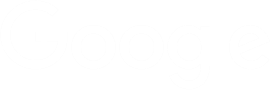

In [26]:
from PIL import Image   # PIL : Python Image Library
from io import BytesIO

Image.open(BytesIO(r.content))

-----
<div class="alert alert-warning">
[Tip] 이미지 저장하기
</div>

In [27]:
import requests   
url = 'https://www.google.co.kr/images/branding/googlelogo/1x/googlelogo_color_272x92dp.png'
r = requests.get(url)  

In [28]:
# url에서 image 이름에 해당하는 부분('/'이후 가장 마지막) 추출
import os 
image_name = os.path.basename(url)  # basename : 경로의 마지막 요소 리턴(/기준 마지막 파일명)
image_name

'googlelogo_color_272x92dp.png'

In [30]:
# 이미지 저장을 위한 폴더 생성
os.getcwd()
# image_folder = f"{os.getcwd()}/image"
# if not os.path.isdir(image_folder):
#     os.mkdir(image_folder)    

# # 이미지 저장 경로 지정: image_folder/image_name
# image_path = os.path.join(image_folder, image_name)

# # 이미지 저장
# image = open(image_path, 'wb') 
# image.write(r.content) 
# image.close() 

'c:\\Users\\USER\\Desktop\\크롤링예제'

-----